In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('../data/hemp-gcms-threshold10-transpose.xlsx')
df

,Type1,Vitamin E succinate (calcium),Clionasterol,Gluco-octonic acid lactone,Guanosine,THC (Dronabino),Cannabidiol (CBD),Linoleic acid (omega-6),"Linoleic acid, ethyl ester","Linoleic acid, glyceryl ester","Linolenic acid, ethyl ester","Oleic acid, ethyl ester","Oleic acid, trans",Palmitic acid
0,1,12.63,15.35,0.00,0.00,0.0,0.00,20.09,0.00,0.00,0.00,0.00,16.42,0.00
1,1,0.00,0.00,0.00,0.00,0.0,0.00,22.93,0.00,0.00,0.00,0.00,0.00,0.00
2,1,0.00,0.00,0.00,0.00,0.0,0.00,35.13,10.36,0.00,12.27,0.00,0.00,0.00
3,1,0.00,0.00,0.00,0.00,0.0,0.00,86.53,0.00,0.00,0.00,0.00,0.00,0.00
4,1,0.00,0.00,0.00,0.00,0.0,0.00,66.24,0.00,0.00,0.00,0.00,0.00,0.00
5,1,0.00,0.00,0.00,0.00,0.0,0.00,34.08,20.61,0.00,0.00,13.02,0.00,0.00
6,2,14.16,29.07,0.00,0.00,0.0,13.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,2,0.00,0.00,0.00,0.00,0.0,0.00,17.63,0.00,0.00,0.00,0.00,0.00,10.21
8,2,0.00,0.00,0.00,0.00,0.0,0.00,15.04,11.49,15.12,0.00,10.72,0.00,0.00
9,2,15.10,22.32,0.00,0.00,18.2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [3]:
df2 = df.drop(columns=df.columns[0])
df2

,Vitamin E succinate (calcium),Clionasterol,Gluco-octonic acid lactone,Guanosine,THC (Dronabino),Cannabidiol (CBD),Linoleic acid (omega-6),"Linoleic acid, ethyl ester","Linoleic acid, glyceryl ester","Linolenic acid, ethyl ester","Oleic acid, ethyl ester","Oleic acid, trans",Palmitic acid
0,12.63,15.35,0.00,0.00,0.0,0.00,20.09,0.00,0.00,0.00,0.00,16.42,0.00
1,0.00,0.00,0.00,0.00,0.0,0.00,22.93,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.0,0.00,35.13,10.36,0.00,12.27,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.0,0.00,86.53,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.0,0.00,66.24,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.0,0.00,34.08,20.61,0.00,0.00,13.02,0.00,0.00
6,14.16,29.07,0.00,0.00,0.0,13.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.0,0.00,17.63,0.00,0.00,0.00,0.00,0.00,10.21
8,0.00,0.00,0.00,0.00,0.0,0.00,15.04,11.49,15.12,0.00,10.72,0.00,0.00
9,15.10,22.32,0.00,0.00,18.2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [4]:
df2_corr = df2.corr()
df2_corr

,Vitamin E succinate (calcium),Clionasterol,Gluco-octonic acid lactone,Guanosine,THC (Dronabino),Cannabidiol (CBD),Linoleic acid (omega-6),"Linoleic acid, ethyl ester","Linoleic acid, glyceryl ester","Linolenic acid, ethyl ester","Oleic acid, ethyl ester","Oleic acid, trans",Palmitic acid
Vitamin E succinate (calcium),1.000000,0.901379,-0.173464,-0.173464,0.576875,0.530165,-0.408827,-0.311073,-0.173464,-0.173464,-0.255852,0.454137,-0.173464
Clionasterol,0.901379,1.000000,-0.199466,-0.199466,0.467014,0.668570,-0.525527,-0.357703,-0.199466,-0.199466,-0.294204,0.258888,-0.199466
Gluco-octonic acid lactone,-0.173464,-0.199466,1.000000,1.000000,-0.090909,-0.090909,-0.283479,-0.163027,-0.090909,-0.090909,-0.134087,-0.090909,-0.090909
Guanosine,-0.173464,-0.199466,1.000000,1.000000,-0.090909,-0.090909,-0.283479,-0.163027,-0.090909,-0.090909,-0.134087,-0.090909,-0.090909
THC (Dronabino),0.576875,0.467014,-0.090909,-0.090909,1.000000,-0.090909,-0.283479,-0.163027,-0.090909,-0.090909,-0.134087,-0.090909,-0.090909
Cannabidiol (CBD),0.530165,0.668570,-0.090909,-0.090909,-0.090909,1.000000,-0.283479,-0.163027,-0.090909,-0.090909,-0.134087,-0.090909,-0.090909
Linoleic acid (omega-6),-0.408827,-0.525527,-0.283479,-0.283479,-0.283479,-0.283479,1.000000,0.089721,-0.111603,0.117984,0.011403,-0.053892,-0.082005
"Linoleic acid, ethyl ester",-0.311073,-0.357703,-0.163027,-0.163027,-0.163027,-0.163027,0.089721,1.000000,0.366370,0.314306,0.880291,-0.163027,-0.163027
"Linoleic acid, glyceryl ester",-0.173464,-0.199466,-0.090909,-0.090909,-0.090909,-0.090909,-0.111603,0.366370,1.000000,-0.090909,0.592490,-0.090909,-0.090909
"Linolenic acid, ethyl ester",-0.173464,-0.199466,-0.090909,-0.090909,-0.090909,-0.090909,0.117984,0.314306,-0.090909,1.000000,-0.134087,-0.090909,-0.090909


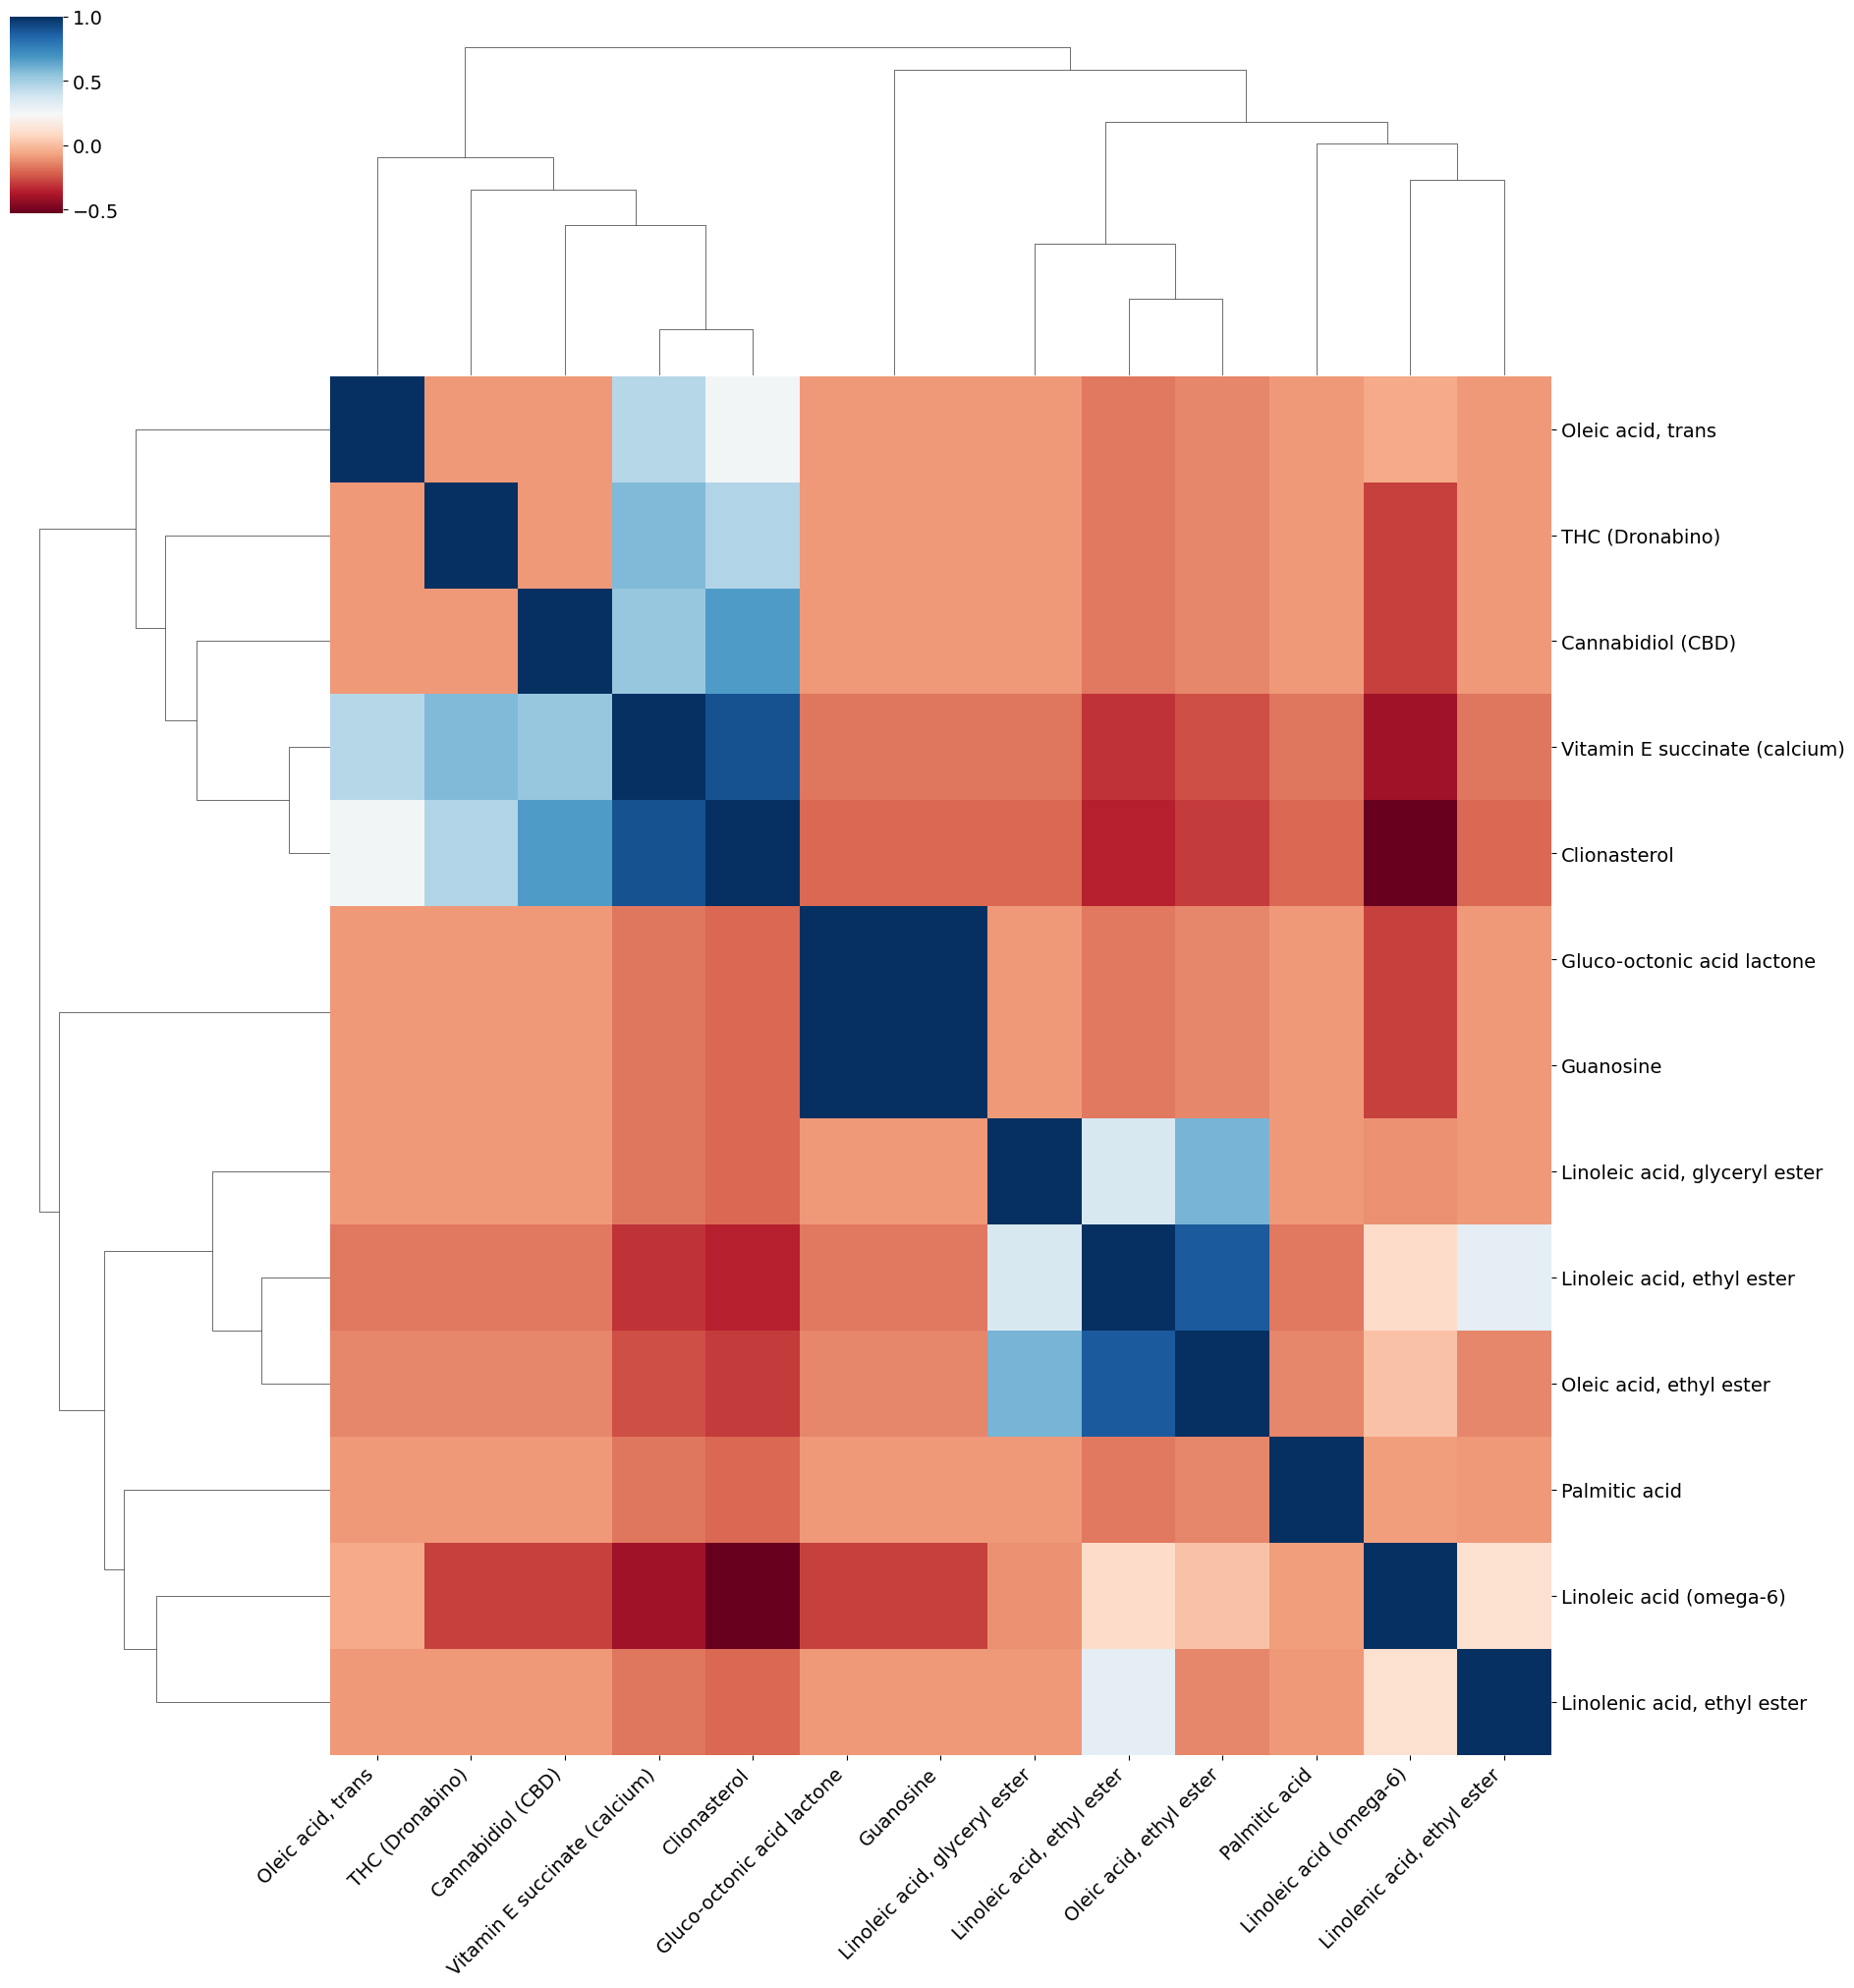

In [5]:
a = sns.clustermap(
    df2_corr,
    method="average",
    cmap='RdBu',
    figsize=(18, 20),
    cbar_pos=(0, 0.9, .03, .1)
)

fontsize = 14

a.ax_heatmap.tick_params(axis='x', labelsize=fontsize)
a.ax_heatmap.tick_params(axis='y', labelsize=fontsize)


plt.setp(a.ax_heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=fontsize)
plt.setp(a.ax_heatmap.get_yticklabels(), rotation=0, fontsize=fontsize)

if a.cax is not None:
    a.cax.tick_params(labelsize=fontsize)
    
#plt.savefig('clustermap10p-features.png', dpi=300, bbox_inches='tight')


plt.show()

In [6]:
row_order = a.dendrogram_row.reordered_ind
col_order = a.dendrogram_col.reordered_ind

In [7]:
row_linkage = a.dendrogram_row.linkage
col_linkage = a.dendrogram_col.linkage

In [8]:
print("Row Order:", row_order)
print("Column Order:", col_order)
print("Row Linkage:\n", row_linkage)
print("Column Linkage:\n", col_linkage)

Row Order: [11, 4, 5, 0, 1, 2, 3, 8, 7, 10, 12, 6, 9]
Column Order: [11, 4, 5, 0, 1, 2, 3, 8, 7, 10, 12, 6, 9]
Row Linkage:
 [[2.00000000e+00 3.00000000e+00 3.10316769e-17 2.00000000e+00]
 [0.00000000e+00 1.00000000e+00 3.30824133e-01 2.00000000e+00]
 [7.00000000e+00 1.00000000e+01 5.46888735e-01 2.00000000e+00]
 [8.00000000e+00 1.50000000e+01 9.39899997e-01 3.00000000e+00]
 [5.00000000e+00 1.40000000e+01 1.06858832e+00 3.00000000e+00]
 [4.00000000e+00 1.70000000e+01 1.31675270e+00 4.00000000e+00]
 [6.00000000e+00 9.00000000e+00 1.39263521e+00 2.00000000e+00]
 [1.10000000e+01 1.80000000e+01 1.55280234e+00 5.00000000e+00]
 [1.20000000e+01 1.90000000e+01 1.64760118e+00 3.00000000e+00]
 [1.60000000e+01 2.10000000e+01 1.80397382e+00 6.00000000e+00]
 [1.30000000e+01 2.20000000e+01 2.17070688e+00 8.00000000e+00]
 [2.00000000e+01 2.30000000e+01 2.32760087e+00 1.30000000e+01]]
Column Linkage:
 [[2.00000000e+00 3.00000000e+00 3.10316769e-17 2.00000000e+00]
 [0.00000000e+00 1.00000000e+00 3.3082

In [9]:
df2_corr_reordered = df2_corr.iloc[row_order, col_order]

In [10]:
df2_corr_lable=df2_corr.index.tolist()
df2_corr_lable

['Vitamin E succinate (calcium)',
 'Clionasterol',
 'Gluco-octonic acid lactone',
 'Guanosine',
 'THC (Dronabino)',
 'Cannabidiol (CBD)',
 'Linoleic acid (omega-6)',
 'Linoleic acid, ethyl ester',
 'Linoleic acid, glyceryl ester',
 'Linolenic acid, ethyl ester',
 'Oleic acid, ethyl ester',
 'Oleic acid, trans',
 'Palmitic acid']

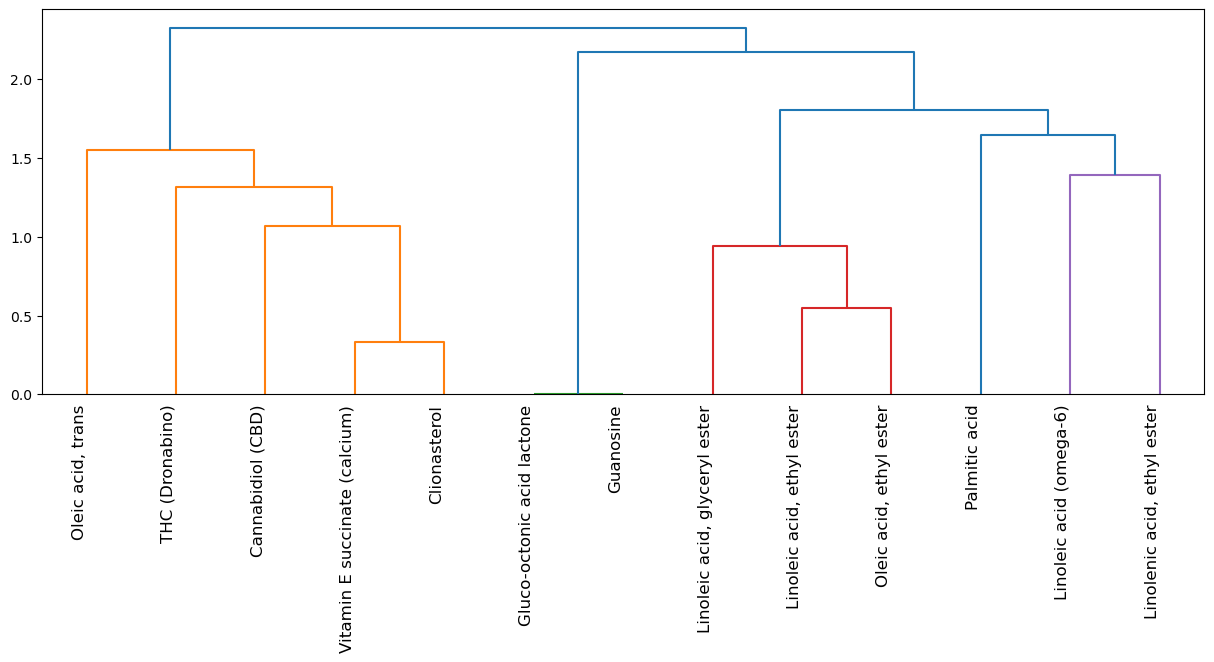

In [12]:
plt.figure(figsize=(15, 5))
sch.dendrogram(row_linkage, labels=df2_corr_lable)
plt.setp(plt.gca().get_xticklabels(), rotation=90, ha='right')
#plt.savefig('threshold10-features-cluster.png', dpi=300, bbox_inches='tight')
plt.show()